In [2]:
import numpy as np 
import pandas as pd 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
#from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
#from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, r2_score
#from sklearn.pipeline import Pipeline
#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [3]:
df = pd.read_csv('2018_2019_24-59mos_stunting_complete.csv')
origfeatures = df.columns
print ("original features count", len(origfeatures))
print ("original features", origfeatures)
df.head()

original features count 41
original features Index(['age_child', 'agemos', 'AgeGroup', 'sex_child', 'gastation',
       'place_delivery', 'assistd', 'typeofd', 'pregtype', 'bw_grams',
       'bw_status', 'ethnicity', 'age_mom', 'agegroup_mom', 'csc_mom',
       'psccat_mom', 'educ_mom', 'occup_mom', 'work_status_mom', 'age_hh',
       'agegroup_HH', 'sex_hh', 'educ_hh', 'psoc_hh', 'work_status_hh',
       'urbanity', 'hhsize', 'hhsize_code', 'drinkingwater', 'recipient_4ps',
       'toilet', 'drinksafe', 'makesafe', 'wcooking', 'whands', 'collect',
       'burn', 'composting', 'dump', 'segregate', 'stunting'],
      dtype='object')


,age_child,agemos,AgeGroup,sex_child,gastation,place_delivery,assistd,typeofd,pregtype,bw_grams,...,drinksafe,makesafe,wcooking,whands,collect,burn,composting,dump,segregate,stunting
0,4,48,3,2,1,1,1,1,1,2400,...,0,0,2,2,0,0,1,0,0,1
1,3,34,1,2,1,1,1,1,1,2500,...,9,9,2,2,0,1,0,1,1,0
2,4,51,3,1,1,1,1,1,1,2500,...,0,0,2,2,0,0,1,0,0,1
3,4,51,3,2,1,0,1,1,1,3200,...,0,0,2,2,0,1,0,0,0,0
4,2,28,1,2,1,1,1,1,1,2800,...,9,9,2,2,0,1,0,1,0,0


#  FEATURE SELECTION USING CHI2

In [4]:
X = df.iloc[:,0:39]
y = df.iloc[:,-1]
feature = SelectKBest(score_func=chi2, k=10)
fit = feature.fit(X,y)

In [5]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [6]:
features = pd.concat([dfcolumns,dfscores], axis = 1)
features.columns = ['Overweight','Scores']
features

,Overweight,Scores
0,age_child,3.948277
1,agemos,42.906582
2,AgeGroup,4.740640
3,sex_child,0.001484
4,gastation,0.054109
5,place_delivery,16.978545
6,assistd,12.760720
7,typeofd,9.612293
8,pregtype,0.106723
9,bw_grams,26906.676442


In [7]:
print(features.nlargest(20, "Scores"))

         Overweight        Scores
9          bw_grams  26906.676442
23          psoc_hh   2902.341297
31        drinksafe    521.402223
19           age_hh    412.355884
32         makesafe    402.927047
34           whands    257.278256
15       psccat_mom    225.877182
28    drinkingwater    171.012291
29    recipient_4ps    130.132928
16         educ_mom    110.779354
35          collect     96.106247
17        occup_mom     92.245430
22          educ_hh     89.268113
33         wcooking     60.139084
18  work_status_mom     48.060331
26           hhsize     46.091784
11        ethnicity     44.836077
1            agemos     42.906582
36             burn     39.736210
38             dump     32.930556


In [8]:
data = df[["bw_grams","psoc_hh","drinksafe","age_hh",
           "makesafe","whands","psccat_mom","drinkingwater",
           "recipient_4ps","educ_mom","stunting"]]

In [9]:
data.columns

Index(['bw_grams', 'psoc_hh', 'drinksafe', 'age_hh', 'makesafe', 'whands',
       'psccat_mom', 'drinkingwater', 'recipient_4ps', 'educ_mom', 'stunting'],
      dtype='object')

In [10]:
data.head()

,bw_grams,psoc_hh,drinksafe,age_hh,makesafe,whands,psccat_mom,drinkingwater,recipient_4ps,educ_mom,stunting
0,2400,6,0,37,0,2,0,0,1,2,1
1,2500,99,9,54,9,2,2,1,0,1,0
2,2500,6,0,38,0,2,0,0,1,2,1
3,3200,6,0,36,0,2,0,0,0,2,0
4,2800,8,9,44,9,2,0,1,0,2,0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14461 entries, 0 to 14460
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   bw_grams       14461 non-null  int64
 1   psoc_hh        14461 non-null  int64
 2   drinksafe      14461 non-null  int64
 3   age_hh         14461 non-null  int64
 4   makesafe       14461 non-null  int64
 5   whands         14461 non-null  int64
 6   psccat_mom     14461 non-null  int64
 7   drinkingwater  14461 non-null  int64
 8   recipient_4ps  14461 non-null  int64
 9   educ_mom       14461 non-null  int64
 10  stunting       14461 non-null  int64
dtypes: int64(11)
memory usage: 1.2 MB


In [12]:
display("Total number of of Duplicates present in data: %s" %data.duplicated().sum())


'Total number of of Duplicates present in data: 204'

In [13]:
data = data.drop_duplicates()

In [14]:
display("Total number of of Duplicates present in data: %s" %data.duplicated().sum())


'Total number of of Duplicates present in data: 0'

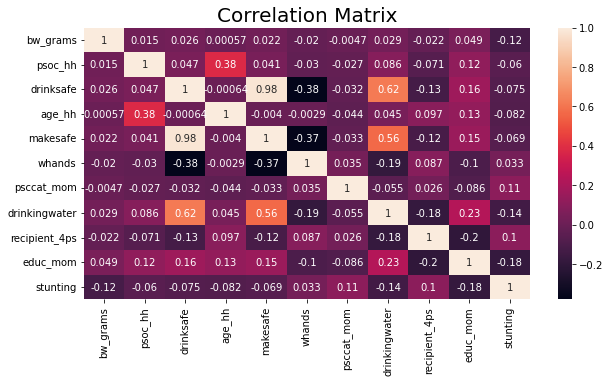

In [15]:
#checking correlation between the variables
plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(), annot=True);
plt.title('Correlation Matrix', fontsize=20);

C:\Users\Supervisor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

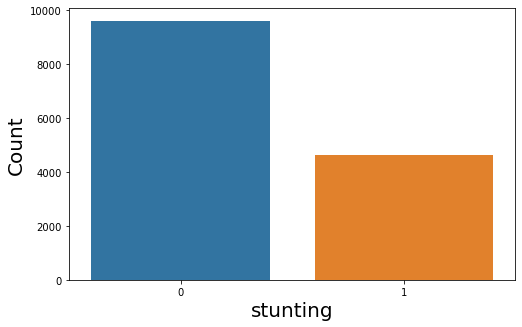

In [16]:
stunting_label = data.stunting.value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(stunting_label.index, stunting_label);
plt.xlabel('stunting', fontsize=20);
plt.ylabel('Count', fontsize=20)

In [17]:
data['stunting'].value_counts()

0    9609
1    4648
Name: stunting, dtype: int64

In [18]:
Final = df[["bw_grams","psoc_hh","drinksafe","age_hh",
           "makesafe","whands","psccat_mom","drinkingwater",
           "recipient_4ps","educ_mom"]]
Target =df['stunting']

In [19]:
Final.head()

,bw_grams,psoc_hh,drinksafe,age_hh,makesafe,whands,psccat_mom,drinkingwater,recipient_4ps,educ_mom
0,2400,6,0,37,0,2,0,0,1,2
1,2500,99,9,54,9,2,2,1,0,1
2,2500,6,0,38,0,2,0,0,1,2
3,3200,6,0,36,0,2,0,0,0,2
4,2800,8,9,44,9,2,0,1,0,2


In [20]:
Final.head()

,bw_grams,psoc_hh,drinksafe,age_hh,makesafe,whands,psccat_mom,drinkingwater,recipient_4ps,educ_mom
0,2400,6,0,37,0,2,0,0,1,2
1,2500,99,9,54,9,2,2,1,0,1
2,2500,6,0,38,0,2,0,0,1,2
3,3200,6,0,36,0,2,0,0,0,2
4,2800,8,9,44,9,2,0,1,0,2


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Final,Target,test_size = 0.2, random_state=42)

In [22]:
Logistic = LogisticRegression()
Log_pred = Logistic.fit(X_train,y_train)
log_pred = Log_pred.predict(X_test)

ascore = accuracy_score(log_pred,y_test)
pred_prob_log_reg = Log_pred.predict_proba(X_test)

print("Training score: {:.3f}".format(Log_pred.score(X_train, y_train)))
print("Accuracy score :",ascore)

Training score: 0.683
Accuracy score : 0.6871759419287936


C:\Users\Supervisor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\Supervisor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


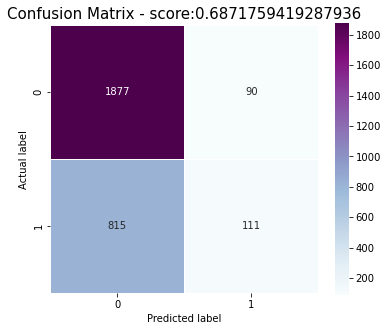

              precision    recall  f1-score   support

           0       0.70      0.95      0.81      1967
           1       0.55      0.12      0.20       926

    accuracy                           0.69      2893
   macro avg       0.62      0.54      0.50      2893
weighted avg       0.65      0.69      0.61      2893



In [23]:
log_model= LogisticRegression()
log_model.fit(X_train,y_train)
logistic_pred= log_model.predict(X_test)
from sklearn import metrics

log_cm = metrics.confusion_matrix(y_test, logistic_pred)
plt.figure(figsize=(6,5))
sns.heatmap(log_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,logistic_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,logistic_pred))


Training score: 0.993
Accuracy score:  0.6812996889042516


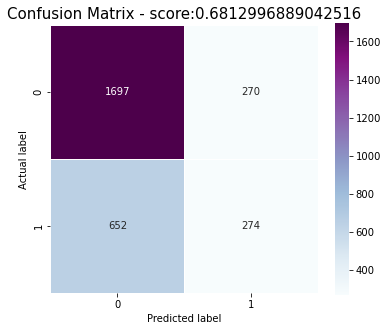

              precision    recall  f1-score   support

           0       0.72      0.86      0.79      1967
           1       0.50      0.30      0.37       926

    accuracy                           0.68      2893
   macro avg       0.61      0.58      0.58      2893
weighted avg       0.65      0.68      0.65      2893



In [24]:
rforest = RandomForestClassifier(n_estimators=30, max_features=3, random_state=0)
r_pred = rforest.fit(X_train,y_train)
rf_pred = r_pred.predict(X_test)
print("Training score: {:.3f}".format(r_pred.score(X_train, y_train)))
print("Accuracy score: ",accuracy_score(rf_pred,y_test))

rforest_cm = metrics.confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(6,5))
sns.heatmap(rforest_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,rf_pred))
plt.title(all_sample_title, size = 15);
plt.show()
 0p 0r0int(metrics.classification_report(y_test,rf_pred))


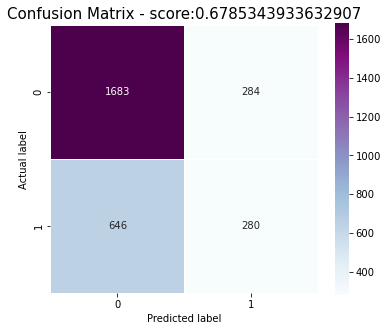

              precision    recall  f1-score   support

           0       0.72      0.86      0.78      1967
           1       0.50      0.30      0.38       926

    accuracy                           0.68      2893
   macro avg       0.61      0.58      0.58      2893
weighted avg       0.65      0.68      0.65      2893



In [25]:
rf_model=RandomForestClassifier(random_state=0)
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
from sklearn import metrics

rf_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(rf_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))


In [26]:
gbr = GradientBoostingClassifier(n_estimators=100, max_depth=10, max_features=3, random_state=0).fit(X_train, y_train)
gbr_pred= gbr.score(X_test, y_test)

gbr_train_accuracy =gbr.score(X_train,y_train)
gbr_accuracy = gbr.score(X_test,y_test)
pred_prob_gbr = gbr.predict_proba(X_test)


print("Training score: {:.3f}".format(gbr.score(X_train, y_train)))
print("Test score: {:.3f}".format(gbr.score(X_test, y_test)))

Training score: 0.930
Test score: 0.685


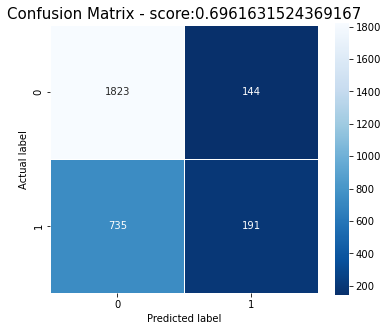

              precision    recall  f1-score   support

           0       0.71      0.93      0.81      1967
           1       0.57      0.21      0.30       926

    accuracy                           0.70      2893
   macro avg       0.64      0.57      0.55      2893
weighted avg       0.67      0.70      0.64      2893



In [27]:
gbr_model=GradientBoostingClassifier(random_state=0)
gbr_test = gbr_model.fit(X_train,y_train)
y_pred_gbr=gbr_test.predict(X_test)
from sklearn import metrics
gbr_pred_randomstate= gbr.score(X_test, y_test)

gbr_cm = metrics.confusion_matrix(y_test, y_pred_gbr)
plt.figure(figsize=(6,5))
sns.heatmap(gbr_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred_gbr))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred_gbr))

In [28]:
data['stunting'].value_counts()

0    9609
1    4648
Name: stunting, dtype: int64

In [29]:
from sklearn.utils import resample

#Separate Target Classes
df_1 = data[data.stunting==0]
df_2 = data[data.stunting==1]

# Upsample minority class
df_2_upsampled = resample(df_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=9609,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_1, df_2_upsampled])
 
# Display new class counts
df_upsampled.stunting.value_counts()
df_upsampled.reset_index(drop=True)

,bw_grams,psoc_hh,drinksafe,age_hh,makesafe,whands,psccat_mom,drinkingwater,recipient_4ps,educ_mom,stunting
0,2500,99,9,54,9,2,2,1,0,1,0
1,3200,6,0,36,0,2,0,0,0,2,0
2,2800,8,9,44,9,2,0,1,0,2,0
3,2700,8,9,44,9,2,0,1,0,3,0
4,3000,6,0,49,0,2,0,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
19213,2600,7,0,39,0,11,0,0,1,2,1
19214,2676,2,9,48,9,2,0,1,0,3,1
19215,3175,8,0,32,0,11,0,1,1,2,1
19216,2800,9,0,25,0,41,0,0,1,2,1


In [30]:
df_upsampled['stunting'].value_counts()

0    9609
1    9609
Name: stunting, dtype: int64

In [31]:
df_upsampled.columns

Index(['bw_grams', 'psoc_hh', 'drinksafe', 'age_hh', 'makesafe', 'whands',
       'psccat_mom', 'drinkingwater', 'recipient_4ps', 'educ_mom', 'stunting'],
      dtype='object')

In [32]:
df_upsampled['stunting'].value_counts()

0    9609
1    9609
Name: stunting, dtype: int64

In [33]:
Final = df_upsampled[["bw_grams","psoc_hh","drinksafe","age_hh",
           "makesafe","whands","psccat_mom","drinkingwater",
           "recipient_4ps","educ_mom"]]
Target =df_upsampled['stunting']

In [34]:
Final.head()

,bw_grams,psoc_hh,drinksafe,age_hh,makesafe,whands,psccat_mom,drinkingwater,recipient_4ps,educ_mom
1,2500,99,9,54,9,2,2,1,0,1
3,3200,6,0,36,0,2,0,0,0,2
4,2800,8,9,44,9,2,0,1,0,2
5,2700,8,9,44,9,2,0,1,0,3
6,3000,6,0,49,0,2,0,0,0,2


In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Final,Target,test_size = 0.2, random_state=42)

In [36]:
Logistic = LogisticRegression()
Log_pred = Logistic.fit(X_train,y_train)
log_pred = Log_pred.predict(X_test)

ascore = accuracy_score(log_pred,y_test)
pred_prob_log_reg = Log_pred.predict_proba(X_test)

print("Training score: {:.3f}".format(Log_pred.score(X_train, y_train)))
print("Accuracy score :",ascore)

Training score: 0.597
Accuracy score : 0.5905306971904266


C:\Users\Supervisor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
rforest = RandomForestClassifier(n_estimators=30, max_features=3, random_state=0)
r_pred = rforest.fit(X_train,y_train)
rf_pred = r_pred.predict(X_test)
print("Training score: {:.3f}".format(r_pred.score(X_train, y_train)))
print("Accuracy score: ",accuracy_score(rf_pred,y_test))

pred_prob_rf = r_pred.predict_proba(X_test)



Training score: 0.996
Accuracy score:  0.8231009365244537


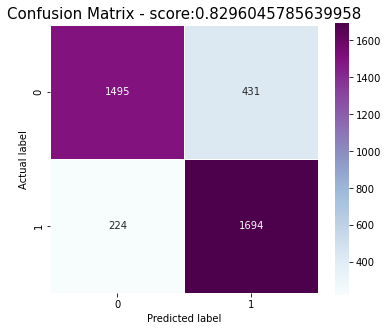

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      1926
           1       0.80      0.88      0.84      1918

    accuracy                           0.83      3844
   macro avg       0.83      0.83      0.83      3844
weighted avg       0.83      0.83      0.83      3844



In [38]:
rf_model=RandomForestClassifier(random_state=0)
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
from sklearn import metrics

rf_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(rf_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))
rf_acc = accuracy_score(y_test,y_pred)

In [39]:
gbr = GradientBoostingClassifier(n_estimators=100, max_depth=10, max_features=3, random_state=0).fit(X_train, y_train)
gbr_pred= gbr.score(X_test, y_test)

gbr_train_accuracy =gbr.score(X_train,y_train)
gbr_accuracy = gbr.score(X_test,y_test)
pred_prob_gbr = gbr.predict_proba(X_test)


print("Training score: {:.3f}".format(gbr.score(X_train, y_train)))
print("Test score: {:.3f}".format(gbr.score(X_test, y_test)))

Training score: 0.935
Test score: 0.777


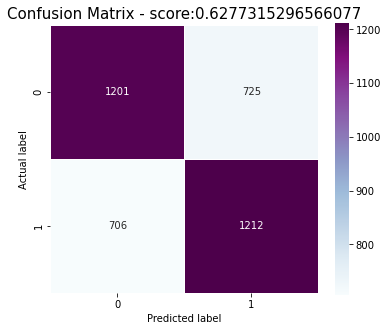

              precision    recall  f1-score   support

           0       0.63      0.62      0.63      1926
           1       0.63      0.63      0.63      1918

    accuracy                           0.63      3844
   macro avg       0.63      0.63      0.63      3844
weighted avg       0.63      0.63      0.63      3844



In [40]:
gbr_model=GradientBoostingClassifier(random_state=0)
gbr_test = gbr_model.fit(X_train,y_train)
y_pred_gbr=gbr_test.predict(X_test)
from sklearn import metrics
gbr_pred_randomstate= gbr.score(X_test, y_test)

gbr_cm = metrics.confusion_matrix(y_test, y_pred_gbr)
plt.figure(figsize=(6,5))
sns.heatmap(gbr_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred_gbr))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred_gbr))
gbr_acc=accuracy_score(y_test,y_pred_gbr)

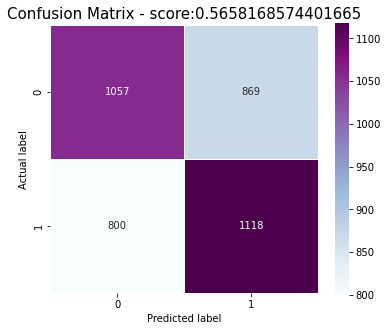

              precision    recall  f1-score   support

           0       0.57      0.55      0.56      1926
           1       0.56      0.58      0.57      1918

    accuracy                           0.57      3844
   macro avg       0.57      0.57      0.57      3844
weighted avg       0.57      0.57      0.57      3844



In [41]:
svc_model=SVC(random_state=0)
svc_model.fit(X_train,y_train)
y_pred=svc_model.predict(X_test)
from sklearn import metrics

svc_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(svc_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))
svc_acc =accuracy_score(y_test,y_pred)


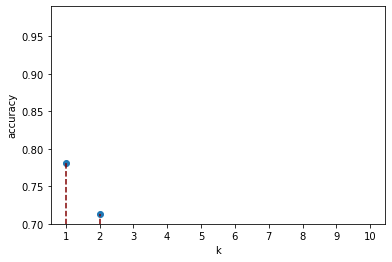

In [42]:
k_range = range(1,11)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.vlines(k_range,0, scores, linestyle="dashed", colors='maroon')
plt.ylim(0.70,0.99)
plt.xticks([i for i in range(1,11)]);

In [43]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(X_train,y_train)
XB_pred = XB.score(X_test,y_test)
XB_train_accuracy = XB.score(X_train,y_train)
pred_prob_XB = XB.predict_proba(X_test)

print("Training accuracy = ",XB.score(X_train,y_train))
#Print Test Accuracy
XB_accuracy = XB.score(X_test,y_test)
print("Testing accuracy = ",XB.score(X_test,y_test))

Training accuracy =  0.7906855730454013
Testing accuracy =  0.6800208116545265


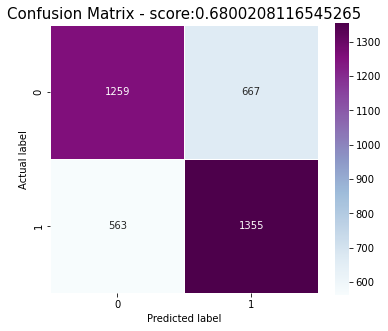

              precision    recall  f1-score   support

           0       0.69      0.65      0.67      1926
           1       0.67      0.71      0.69      1918

    accuracy                           0.68      3844
   macro avg       0.68      0.68      0.68      3844
weighted avg       0.68      0.68      0.68      3844



0.6800208116545265

In [44]:
XB_model=xgb.XGBClassifier()
XB_model.fit(X_train,y_train)
y_pred=XB_model.predict(X_test)
from sklearn import metrics

XB_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(XB_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))
XG_BOOST = accuracy_score(y_test,y_pred)
XG_BOOST

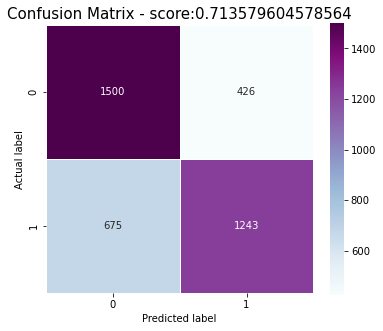

              precision    recall  f1-score   support

           0       0.69      0.78      0.73      1926
           1       0.74      0.65      0.69      1918

    accuracy                           0.71      3844
   macro avg       0.72      0.71      0.71      3844
weighted avg       0.72      0.71      0.71      3844



In [45]:
knn_model=KNeighborsClassifier(n_neighbors = 2)
knn_model.fit(X_train,y_train)
y_pred_knn=knn_model.predict(X_test)
from sklearn import metrics

knn_cm = metrics.confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6,5))
sns.heatmap(knn_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred_knn))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred_knn))
pred_prob_knn = gbr.predict_proba(X_test)
knn_pred_acc = accuracy_score(y_test,y_pred_knn)

In [46]:
#2. Gaussian Naive Bayes Classifier
#t0 = time()
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred = gnb.score(X_test,y_test)
gnb_train_accuracy = gnb.score(X_train,y_train)
pred_prob_gnb = gnb.predict_proba(X_test)
gnb_acc = gnb.predict(X_test)

print("Training accuracy = ",gnb.score(X_train,y_train))
#Print Test Accuracy
gnb_accuracy = gnb.score(X_test,y_test)
print("Testing accuracy = ",gnb.score(X_test,y_test))
gnb_acc2 = accuracy_score(gnb_acc,y_test)
gnb_acc2

Training accuracy =  0.5967867828801874
Testing accuracy =  0.5907908428720083


0.5907908428720083

In [47]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob_log_reg[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob_rf[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob_gbr[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob_knn[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob_XB[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob_gnb[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob_log_reg[:,1],multi_class='ovr')
auc_score2 = roc_auc_score(y_test, pred_prob_rf[:,1],multi_class='ovr')
auc_score3 = roc_auc_score(y_test, pred_prob_gbr[:,1],multi_class='ovr')
auc_score4 = roc_auc_score(y_test, pred_prob_knn[:,1],multi_class='ovr')
auc_score5 = roc_auc_score(y_test, pred_prob_XB[:,1],multi_class='ovr')
auc_score6 = roc_auc_score(y_test, pred_prob_gnb[:,1],multi_class='ovr')


print(auc_score1, auc_score2,auc_score3, auc_score4,auc_score5,auc_score6)

0.6213165269291199 0.9036712372376471 0.8540250206547363 0.8540250206547363 0.7497148130462136 0.6264030602576888


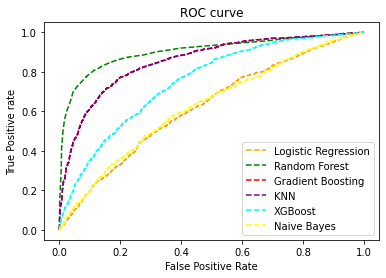

In [48]:
# plot roc curves
plt.plot(fpr1, tpr1,linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2,linestyle='--',color='green', label='Random Forest')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Gradient Boosting')
plt.plot(fpr4, tpr4, linestyle='--',color='purple', label='KNN')
plt.plot(fpr5, tpr5, linestyle='--',color='cyan', label='XGBoost')
plt.plot(fpr6, tpr6, linestyle='--',color='yellow', label='Naive Bayes')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [49]:
predictions_acc = { "Model": ['Logistic Regression', 'Random Forest Classifier','Gradient Boosting Classifier', 'SVC','KNierest Neighbor','Extreme Gradient Boosting', 'Naive Bayes Classifier'],
"Accuracy": [ascore,rf_acc,gbr_accuracy,svc_acc,knn_pred_acc,XG_BOOST,gnb_acc2]}

In [50]:
model_acc = pd.DataFrame(predictions_acc, columns=["Model", "Accuracy"])
model_acc

,Model,Accuracy
0,Logistic Regression,0.590531
1,Random Forest Classifier,0.829605
2,Gradient Boosting Classifier,0.776795
3,SVC,0.565817
4,KNierest Neighbor,0.713580
5,Extreme Gradient Boosting,0.680021
6,Naive Bayes Classifier,0.590791


In [51]:
Model_Name = ['Logistic Regression', 'Random Forest Classifier','Gradient Boosting Classifier', 'SVC','KNierest Neighbor','XBoost', 'Naive Bayes Classifier']
Accuracy = [ascore,rf_acc,gbr_accuracy,svc_acc,knn_pred_acc,XG_BOOST,gnb_acc2]

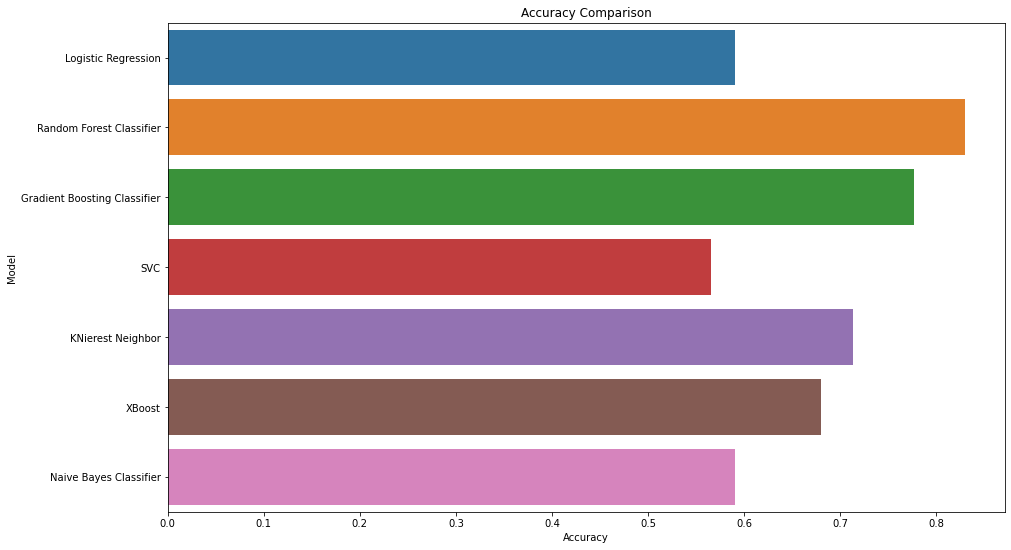

In [52]:
plt.figure(figsize=(15,9))
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
sns.barplot(x = Accuracy,y = Model_Name)
plt.show()

In [53]:
y_test_pred = rf_model.predict(X_test)
print("Accuracy Score of Random Forest:",accuracy_score(y_test,y_test_pred))

Accuracy Score of Random Forest: 0.8296045785639958


In [54]:
output = pd.DataFrame({'Real_class': y_test, 'Predicted_class': y_test_pred, 'Difference': y_test-y_test_pred})
output.head(10)

,Real_class,Predicted_class,Difference
5794,1,0,1
8936,1,0,1
4280,1,1,0
6071,0,0,0
7160,1,1,0
8730,1,1,0
13335,0,0,0
9085,0,0,0
10959,0,1,-1
10113,1,1,0


# Feature Importance using ExtraTreeClassifier

In [55]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0.03589664 0.05263877 0.03116825 0.0300751  0.00583576 0.00991135
 0.00706206 0.01157696 0.00400335 0.06001781 0.01314616 0.01344991
 0.05231248 0.01685239 0.03008847 0.0242754  0.03944482 0.02385209
 0.01701865 0.05429864 0.02418421 0.0135343  0.03650789 0.04354299
 0.00761945 0.02584455 0.04577927 0.01879609 0.01599057 0.02285151
 0.00939855 0.02088224 0.02303449 0.04123659 0.04147119 0.01531788
 0.02150954 0.01995389 0.01961974]


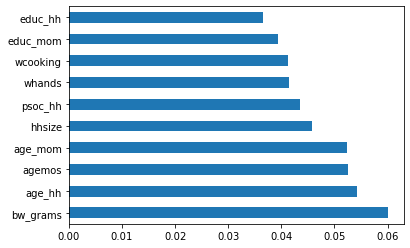

In [56]:
f_importances = pd.Series(model.feature_importances_, index = X.columns)
f_importances.nlargest(10).plot(kind='barh')
plt.show()

In [57]:
data2 = df[["bw_grams","age_mom","age_hh","agemos","hhsize","psoc_hh",
             "whands","wcooking","educ_mom","educ_hh","stunting"]]

In [58]:
data2.head()

,bw_grams,age_mom,age_hh,agemos,hhsize,psoc_hh,whands,wcooking,educ_mom,educ_hh,stunting
0,2400,33,37,48,5,6,2,2,2,3,1
1,2500,26,54,34,10,99,2,2,1,2,0
2,2500,35,38,51,5,6,2,2,2,1,1
3,3200,38,36,51,7,6,2,2,2,2,0
4,2800,43,44,28,8,8,2,2,2,1,0


In [59]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14461 entries, 0 to 14460
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   bw_grams  14461 non-null  int64
 1   age_mom   14461 non-null  int64
 2   age_hh    14461 non-null  int64
 3   agemos    14461 non-null  int64
 4   hhsize    14461 non-null  int64
 5   psoc_hh   14461 non-null  int64
 6   whands    14461 non-null  int64
 7   wcooking  14461 non-null  int64
 8   educ_mom  14461 non-null  int64
 9   educ_hh   14461 non-null  int64
 10  stunting  14461 non-null  int64
dtypes: int64(11)
memory usage: 1.2 MB


In [60]:
display("Total number of of Duplicates present in data: %s" %data2.duplicated().sum())

'Total number of of Duplicates present in data: 18'

In [61]:
data2 = data2.drop_duplicates()

In [62]:
display("Total number of of Duplicates present in data: %s" %data2.duplicated().sum())

'Total number of of Duplicates present in data: 0'

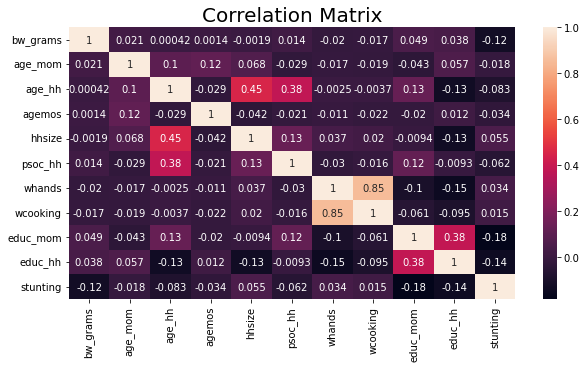

In [63]:
#checking correlation between the variables
plt.figure(figsize=(10, 5))
sns.heatmap(data2.corr(), annot=True);
plt.title('Correlation Matrix', fontsize=20);

C:\Users\Supervisor\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Count')

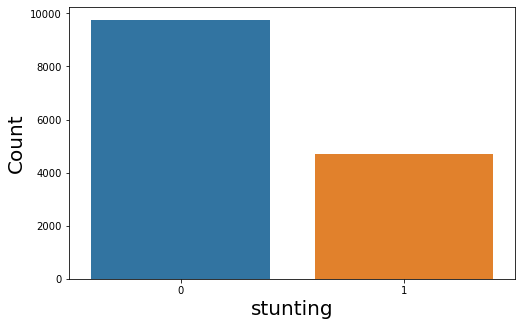

In [64]:
stunting_label = data2.stunting.value_counts()
plt.figure(figsize=(8,5))
sns.barplot(stunting_label.index, stunting_label);
plt.xlabel('stunting', fontsize=20)
plt.ylabel('Count',fontsize=20)

In [65]:
Final2 = df[["bw_grams","age_mom","age_hh","agemos","hhsize","psoc_hh",
             "whands","wcooking","educ_mom","educ_hh"]]
Target2 =df['stunting']

In [66]:
Final2.head()

,bw_grams,age_mom,age_hh,agemos,hhsize,psoc_hh,whands,wcooking,educ_mom,educ_hh
0,2400,33,37,48,5,6,2,2,2,3
1,2500,26,54,34,10,99,2,2,1,2
2,2500,35,38,51,5,6,2,2,2,1
3,3200,38,36,51,7,6,2,2,2,2
4,2800,43,44,28,8,8,2,2,2,1


In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Final2,Target2,test_size = 0.2, random_state=42)

In [68]:
Logistic = LogisticRegression()
Log_pred = Logistic.fit(X_train,y_train)
log_pred = Log_pred.predict(X_test)

ascore = accuracy_score(log_pred,y_test)
pred_prob_log_reg = Log_pred.predict_proba(X_test)

print("Training score: {:.3f}".format(Log_pred.score(X_train, y_train)))
print("Accuracy score :",ascore)

C:\Users\Supervisor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training score: 0.674
Accuracy score : 0.6781887314206706


In [69]:
rforest = RandomForestClassifier(n_estimators=30, max_features=3, random_state=0)
r_pred = rforest.fit(X_train,y_train)
rf_pred = r_pred.predict(X_test)
print("Training score: {:.3f}".format(r_pred.score(X_train, y_train)))
print("Accuracy score: ",accuracy_score(rf_pred,y_test))


Training score: 0.998
Accuracy score:  0.6802627030763913


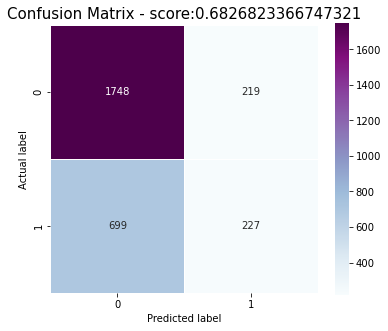

              precision    recall  f1-score   support

           0       0.71      0.89      0.79      1967
           1       0.51      0.25      0.33       926

    accuracy                           0.68      2893
   macro avg       0.61      0.57      0.56      2893
weighted avg       0.65      0.68      0.64      2893



In [70]:
rf_model=RandomForestClassifier(random_state=0)
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
from sklearn import metrics

rf_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(rf_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))


In [71]:
data2['stunting'].value_counts()

0    9754
1    4689
Name: stunting, dtype: int64

In [72]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14443 entries, 0 to 14460
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   bw_grams  14443 non-null  int64
 1   age_mom   14443 non-null  int64
 2   age_hh    14443 non-null  int64
 3   agemos    14443 non-null  int64
 4   hhsize    14443 non-null  int64
 5   psoc_hh   14443 non-null  int64
 6   whands    14443 non-null  int64
 7   wcooking  14443 non-null  int64
 8   educ_mom  14443 non-null  int64
 9   educ_hh   14443 non-null  int64
 10  stunting  14443 non-null  int64
dtypes: int64(11)
memory usage: 1.3 MB


In [73]:
data2.head()

,bw_grams,age_mom,age_hh,agemos,hhsize,psoc_hh,whands,wcooking,educ_mom,educ_hh,stunting
0,2400,33,37,48,5,6,2,2,2,3,1
1,2500,26,54,34,10,99,2,2,1,2,0
2,2500,35,38,51,5,6,2,2,2,1,1
3,3200,38,36,51,7,6,2,2,2,2,0
4,2800,43,44,28,8,8,2,2,2,1,0


In [74]:
from sklearn.utils import resample

# Separate Target Classes
df_1 = data2[data2.stunting==0]
df_2 = data2[data2.stunting==1]
 
# Upsample minority class
df_2_upsampled2 = resample(df_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=9754,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled2 = pd.concat([df_1, df_2_upsampled2])
 
# Display new class counts
df_upsampled2.stunting.value_counts()
df_upsampled2.reset_index(drop=True)

,bw_grams,age_mom,age_hh,agemos,hhsize,psoc_hh,whands,wcooking,educ_mom,educ_hh,stunting
0,2500,26,54,34,10,99,2,2,1,2,0
1,3200,38,36,51,7,6,2,2,2,2,0
2,2800,43,44,28,8,8,2,2,2,1,0
3,2700,21,44,40,8,8,2,2,3,1,0
4,3000,23,49,26,5,6,2,2,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...
19503,2600,26,47,24,11,99,2,2,2,1,1
19504,3175,25,51,39,4,2,1,1,2,3,1
19505,2904,26,28,36,5,9,2,2,2,1,1
19506,2900,30,76,36,9,99,14,14,2,2,1


In [75]:
df_upsampled2.columns

Index(['bw_grams', 'age_mom', 'age_hh', 'agemos', 'hhsize', 'psoc_hh',
       'whands', 'wcooking', 'educ_mom', 'educ_hh', 'stunting'],
      dtype='object')

In [76]:
df_upsampled2['stunting'].value_counts()

0    9754
1    9754
Name: stunting, dtype: int64

In [77]:
Final3 = df_upsampled2[["bw_grams","age_mom","age_hh","agemos","hhsize","psoc_hh",
             "whands","wcooking","educ_mom","educ_hh"]]
Target3 =df_upsampled2['stunting']

In [78]:
Final3.head()

,bw_grams,age_mom,age_hh,agemos,hhsize,psoc_hh,whands,wcooking,educ_mom,educ_hh
1,2500,26,54,34,10,99,2,2,1,2
3,3200,38,36,51,7,6,2,2,2,2
4,2800,43,44,28,8,8,2,2,2,1
5,2700,21,44,40,8,8,2,2,3,1
6,3000,23,49,26,5,6,2,2,2,3


In [79]:
Target3.value_counts()

0    9754
1    9754
Name: stunting, dtype: int64

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Final3,Target3,test_size = 0.2, random_state=42)

In [81]:
Logistic = LogisticRegression()
Log_pred = Logistic.fit(X_train,y_train)
log_pred = Log_pred.predict(X_test)

ascore = accuracy_score(log_pred,y_test)
pred_prob_log_reg = Log_pred.predict_proba(X_test)

print("Training score: {:.3f}".format(Log_pred.score(X_train, y_train)))
print("Accuracy score :",ascore)

Training score: 0.579
Accuracy score : 0.5768836494105587


C:\Users\Supervisor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [82]:
rforest = RandomForestClassifier(n_estimators=30, max_features=3, random_state=0)
r_pred = rforest.fit(X_train,y_train)
rf_pred = r_pred.predict(X_test)
print("Training score: {:.3f}".format(r_pred.score(X_train, y_train)))
print("Accuracy score: ",accuracy_score(rf_pred,y_test))

pred_prob_rf = r_pred.predict_proba(X_test)

Training score: 1.000
Accuracy score:  0.8518708354689902


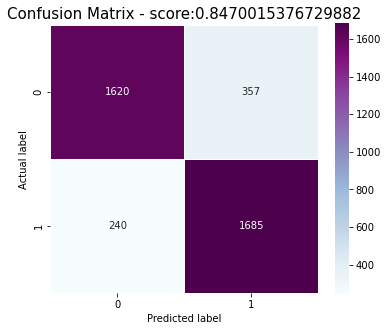

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1977
           1       0.83      0.88      0.85      1925

    accuracy                           0.85      3902
   macro avg       0.85      0.85      0.85      3902
weighted avg       0.85      0.85      0.85      3902



In [83]:
rf_model=RandomForestClassifier(random_state=0)
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
from sklearn import metrics

rf_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(rf_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))
rf_acc = accuracy_score(y_test,y_pred)

In [84]:
 gbr = GradientBoostingClassifier(n_estimators=100, max_depth=10, max_features=3, random_state=0).fit(X_train, y_train)
gbr_pred= gbr.score(X_test, y_test)

gbr_train_accuracy =gbr.score(X_train,y_train)
gbr_accuracy = gbr.score(X_test,y_test)
pred_prob_gbr = gbr.predict_proba(X_test)


print("Training score: {:.3f}".format(gbr.score(X_train, y_train)))
print("Test score: {:.3f}".format(gbr.score(X_test, y_test)))

Training score: 0.972
Test score: 0.813


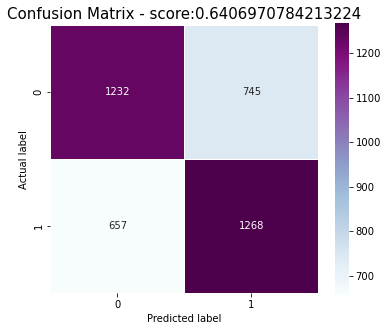

              precision    recall  f1-score   support

           0       0.65      0.62      0.64      1977
           1       0.63      0.66      0.64      1925

    accuracy                           0.64      3902
   macro avg       0.64      0.64      0.64      3902
weighted avg       0.64      0.64      0.64      3902



In [85]:
gbr_model=GradientBoostingClassifier(random_state=0)
gbr_test = gbr_model.fit(X_train,y_train)
y_pred_gbr=gbr_test.predict(X_test)
from sklearn import metrics
gbr_pred_randomstate= gbr.score(X_test, y_test)

gbr_cm = metrics.confusion_matrix(y_test, y_pred_gbr)
plt.figure(figsize=(6,5))
sns.heatmap(gbr_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred_gbr))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred_gbr))
gbr_acc=accuracy_score(y_test,y_pred_gbr)

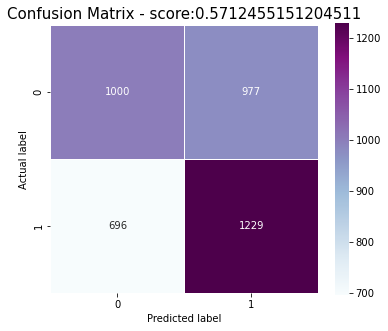

              precision    recall  f1-score   support

           0       0.59      0.51      0.54      1977
           1       0.56      0.64      0.60      1925

    accuracy                           0.57      3902
   macro avg       0.57      0.57      0.57      3902
weighted avg       0.57      0.57      0.57      3902



In [86]:
svc_model=SVC(random_state=0)
svc_model.fit(X_train,y_train)
y_pred=svc_model.predict(X_test)
from sklearn import metrics

svc_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(svc_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))
svc_acc =accuracy_score(y_test,y_pred)


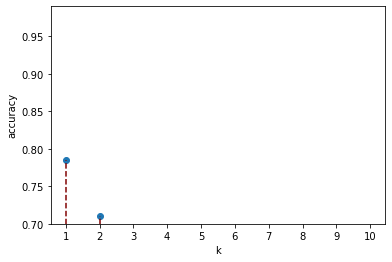

In [87]:
k_range = range(1,11)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.vlines(k_range,0, scores, linestyle="dashed", colors='maroon')
plt.ylim(0.70,0.99)
plt.xticks([i for i in range(1,11)]);

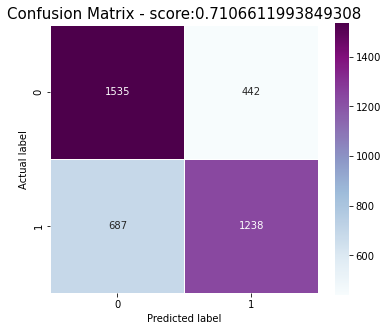

              precision    recall  f1-score   support

           0       0.69      0.78      0.73      1977
           1       0.74      0.64      0.69      1925

    accuracy                           0.71      3902
   macro avg       0.71      0.71      0.71      3902
weighted avg       0.71      0.71      0.71      3902



In [88]:
knn_model=KNeighborsClassifier(n_neighbors = 2)
knn_model.fit(X_train,y_train)
y_pred_knn=knn_model.predict(X_test)
from sklearn import metrics

knn_cm = metrics.confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6,5))
sns.heatmap(knn_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred_knn))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred_knn))
pred_prob_knn = gbr.predict_proba(X_test)
knn_pred_acc = accuracy_score(y_test,y_pred_knn)

In [89]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(X_train,y_train)
XB_pred = XB.score(X_test,y_test)
XB_train_accuracy = XB.score(X_train,y_train)
pred_prob_XB = XB.predict_proba(X_test)

print("Training accuracy = ",XB.score(X_train,y_train))
#Print Test Accuracy
XB_accuracy = XB.score(X_test,y_test)
print("Testing accuracy = ",XB.score(X_test,y_test))

Training accuracy =  0.855760604895553
Testing accuracy =  0.7347514095335725


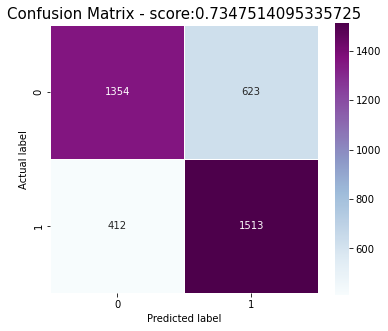

              precision    recall  f1-score   support

           0       0.77      0.68      0.72      1977
           1       0.71      0.79      0.75      1925

    accuracy                           0.73      3902
   macro avg       0.74      0.74      0.73      3902
weighted avg       0.74      0.73      0.73      3902



0.7347514095335725

In [90]:
XB_model=xgb.XGBClassifier()
XB_model.fit(X_train,y_train)
y_pred=XB_model.predict(X_test)
from sklearn import metrics

XB_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(XB_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))
XG_BOOST = accuracy_score(y_test,y_pred)
XG_BOOST

In [91]:
#2. Gaussian Naive Bayes Classifier
#t0 = time()
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred = gnb.score(X_test,y_test)
gnb_train_accuracy = gnb.score(X_train,y_train)
pred_prob_gnb = gnb.predict_proba(X_test)
gnb_acc = gnb.predict(X_test)

print("Training accuracy = ",gnb.score(X_train,y_train))
#Print Test Accuracy
gnb_accuracy = gnb.score(X_test,y_test)
print("Testing accuracy = ",gnb.score(X_test,y_test))
gnb_acc2 = accuracy_score(gnb_acc,y_test)
gnb_acc2

Training accuracy =  0.6037421504549533
Testing accuracy =  0.5940543311122501


0.5940543311122501

In [92]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob_log_reg[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob_rf[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob_gbr[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob_knn[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob_XB[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob_gnb[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob_log_reg[:,1],multi_class='ovr')
auc_score2 = roc_auc_score(y_test, pred_prob_rf[:,1],multi_class='ovr')
auc_score3 = roc_auc_score(y_test, pred_prob_gbr[:,1],multi_class='ovr')
auc_score4 = roc_auc_score(y_test, pred_prob_knn[:,1],multi_class='ovr')
auc_score5 = roc_auc_score(y_test, pred_prob_XB[:,1],multi_class='ovr')
auc_score6 = roc_auc_score(y_test, pred_prob_gnb[:,1],multi_class='ovr')


print(auc_score1, auc_score2,auc_score3, auc_score4,auc_score5,auc_score6)

0.6113883688390516 0.9223239987124661 0.8914884811698164 0.8914884811698164 0.8053871469956448 0.6338807980082638


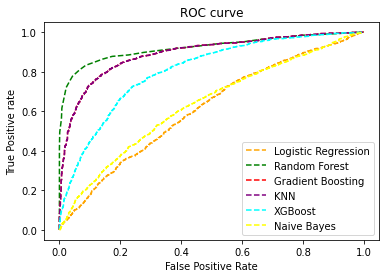

In [93]:
# plot roc curves
plt.plot(fpr1, tpr1,linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2,linestyle='--',color='green', label='Random Forest')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Gradient Boosting')
plt.plot(fpr4, tpr4, linestyle='--',color='purple', label='KNN')
plt.plot(fpr5, tpr5, linestyle='--',color='cyan', label='XGBoost')
plt.plot(fpr6, tpr6, linestyle='--',color='yellow', label='Naive Bayes')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [94]:
predictions_acc = { "Model": ['Logistic Regression', 'Random Forest Classifier','Gradient Boosting Classifier', 'SVC','KNierest Neighbor','XBoost', 'Naive Bayes Classifier'],
"Accuracy": [ascore,rf_acc,gbr_accuracy,svc_acc,knn_pred_acc,XG_BOOST,gnb_acc2]}


In [95]:
model_acc = pd.DataFrame(predictions_acc, columns=["Model", "Accuracy"])
model_acc

,Model,Accuracy
0,Logistic Regression,0.576884
1,Random Forest Classifier,0.847002
2,Gradient Boosting Classifier,0.813173
3,SVC,0.571246
4,KNierest Neighbor,0.710661
5,XBoost,0.734751
6,Naive Bayes Classifier,0.594054


In [96]:
Model_Name = ['Logistic Regression', 'Random Forest Classifier','Gradient Boosting Classifier', 'SVC','KNierest Neighbor','XBoost', 'Naive Bayes Classifier']
Accuracy = [ascore,rf_acc,gbr_accuracy,svc_acc,knn_pred_acc,XG_BOOST,gnb_acc2]

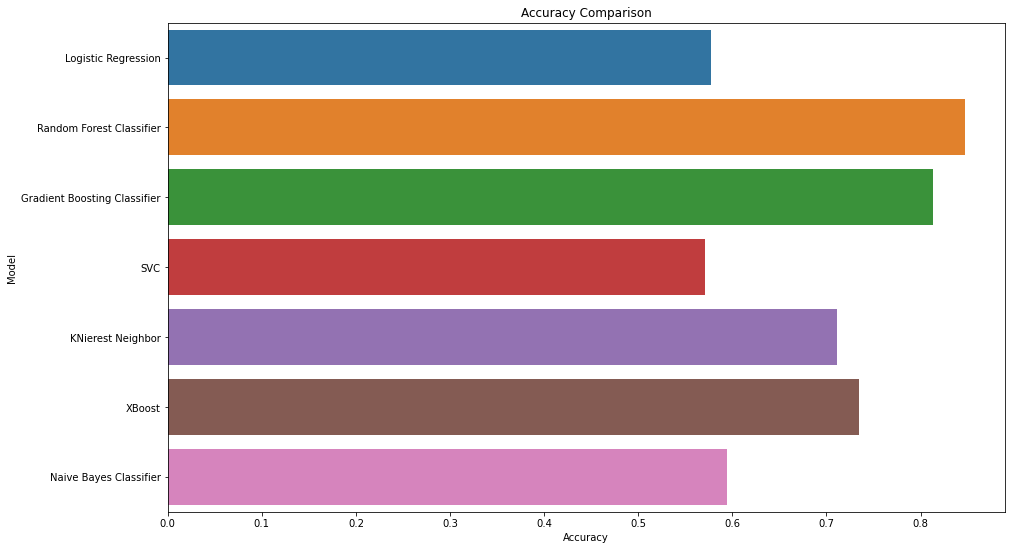

In [97]:
plt.figure(figsize=(15,9))
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
sns.barplot(x = Accuracy,y = Model_Name)
plt.show()

In [98]:
y_test_pred = rf_model.predict(X_test)
print("Accuracy Score of Random Forest:",accuracy_score(y_test,y_test_pred))

Accuracy Score of Random Forest: 0.8470015376729882


In [99]:
output = pd.DataFrame({'Real_class': y_test, 'Predicted_class': y_test_pred, 'Difference': y_test-y_test_pred})
output.head(10)

,Real_class,Predicted_class,Difference
4171,1,0,1
12106,0,0,0
6123,0,0,0
1461,1,1,0
2553,1,0,1
7701,1,1,0
3864,1,1,0
13160,1,1,0
1024,0,0,0
8783,0,1,-1


# WRAPPER METHOD USING FORWARD SELECTION

In [100]:
#shape of the data
df.shape

(14461, 41)

In [101]:
df.isnull().sum()

age_child          0
agemos             0
AgeGroup           0
sex_child          0
gastation          0
place_delivery     0
assistd            0
typeofd            0
pregtype           0
bw_grams           0
bw_status          0
ethnicity          0
age_mom            0
agegroup_mom       0
csc_mom            0
psccat_mom         0
educ_mom           0
occup_mom          0
work_status_mom    0
age_hh             0
agegroup_HH        0
sex_hh             0
educ_hh            0
psoc_hh            0
work_status_hh     0
urbanity           0
hhsize             0
hhsize_code        0
drinkingwater      0
recipient_4ps      0
toilet             0
drinksafe          0
makesafe           0
wcooking           0
whands             0
collect            0
burn               0
composting         0
dump               0
segregate          0
stunting           0
dtype: int64

In [102]:
x = df.drop(['stunting'], axis=1)
y = df['stunting']

In [103]:
x.shape, y.shape

((14461, 40), (14461,))

In [104]:
# importing the models

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression

In [105]:
# calling the linear regression model

lreg = LinearRegression()
sfs1 = sfs(lreg, k_features=10, forward=True, verbose=2, scoring='neg_mean_squared_error')

In [106]:
# calling the linear regression model

lreg = LinearRegression()
sfs1 = sfs(lreg, k_features=10, forward=True, verbose=2, scoring='neg_mean_squared_error')
sfs1 = sfs1.fit(X, y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    0.3s finished

[2022-11-15 11:05:17] Features: 1/10 -- score: -0.2121080424423007[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    0.5s finished

[2022-11-15 11:05:18] Features: 2/10 -- score: -0.20922905582881723[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    0.4s finished

[2022-11-15 11:05:19] Features: 3/10 -- score: -0.2072140820167009[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Do

# FORWARD FEATURE SELECTION

In [107]:
feat_names = list(sfs1.k_feature_names_)
print(feat_names)

['place_delivery', 'bw_grams', 'csc_mom', 'psccat_mom', 'educ_mom', 'age_hh', 'educ_hh', 'hhsize_code', 'drinkingwater', 'collect']


In [108]:
# creating a new dataframe using the above variables and adding the target variable
new_data = df[feat_names]
new_data['stunting'] = df['stunting']

# first five rows of the new data
new_data.head()

C:\Users\SUPERV~1\AppData\Local\Temp/ipykernel_12104/2937021417.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['stunting'] = df['stunting']


,place_delivery,bw_grams,csc_mom,psccat_mom,educ_mom,age_hh,educ_hh,hhsize_code,drinkingwater,collect,stunting
0,1,2400,2,0,2,37,3,0,0,0,1
1,1,2500,4,2,1,54,2,1,1,0,0
2,1,2500,2,0,2,38,1,0,0,0,1
3,0,3200,2,0,2,36,2,1,0,0,0
4,1,2800,2,0,2,44,1,1,1,0,0


In [109]:
# shape of new and original data
new_data.shape, df.shape

((14461, 11), (14461, 41))

In [110]:
new_data.head()

,place_delivery,bw_grams,csc_mom,psccat_mom,educ_mom,age_hh,educ_hh,hhsize_code,drinkingwater,collect,stunting
0,1,2400,2,0,2,37,3,0,0,0,1
1,1,2500,4,2,1,54,2,1,1,0,0
2,1,2500,2,0,2,38,1,0,0,0,1
3,0,3200,2,0,2,36,2,1,0,0,0
4,1,2800,2,0,2,44,1,1,1,0,0


In [111]:
new_data.describe()

,place_delivery,bw_grams,csc_mom,psccat_mom,educ_mom,age_hh,educ_hh,hhsize_code,drinkingwater,collect,stunting
count,14461.000000,14461.000000,14461.000000,14461.000000,14461.000000,14461.000000,14461.000000,14461.000000,14461.000000,14461.000000,14461.000000
mean,0.888597,2974.954429,3.025932,0.562340,2.082913,43.178065,1.781827,0.537169,0.395616,0.463453,0.324805
std,0.314642,598.402473,1.470533,0.866586,0.685434,13.359164,0.733352,0.498634,0.488999,0.498680,0.468318
min,0.000000,900.000000,1.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2629.000000,2.000000,0.000000,2.000000,33.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,3000.000000,2.000000,0.000000,2.000000,40.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,3200.000000,5.000000,2.000000,3.000000,52.000000,2.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,9500.000000,6.000000,2.000000,4.000000,96.000000,4.000000,1.000000,1.000000,1.000000,1.000000


In [112]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14461 entries, 0 to 14460
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   place_delivery  14461 non-null  int64
 1   bw_grams        14461 non-null  int64
 2   csc_mom         14461 non-null  int64
 3   psccat_mom      14461 non-null  int64
 4   educ_mom        14461 non-null  int64
 5   age_hh          14461 non-null  int64
 6   educ_hh         14461 non-null  int64
 7   hhsize_code     14461 non-null  int64
 8   drinkingwater   14461 non-null  int64
 9   collect         14461 non-null  int64
 10  stunting        14461 non-null  int64
dtypes: int64(11)
memory usage: 1.2 MB


In [113]:
display("Total number of of Duplicates present in data: %s" %new_data.duplicated().sum())

'Total number of of Duplicates present in data: 543'

In [114]:
new_data = new_data.drop_duplicates()
display("Total number of of Duplicates present in data: %s" %new_data.duplicated().sum())

'Total number of of Duplicates present in data: 0'

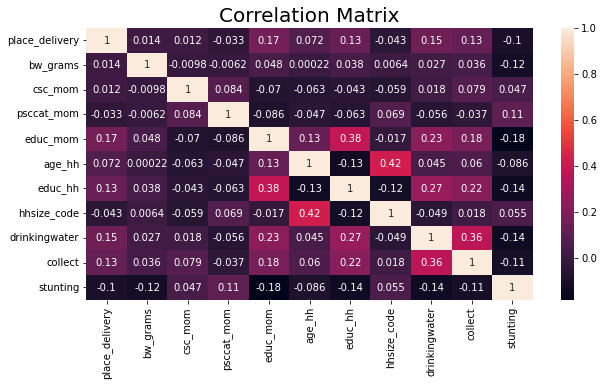

In [115]:
#checking correlation between the variables
plt.figure(figsize=(10, 5))
sns.heatmap(new_data.corr(), annot=True);
plt.title('Correlation Matrix', fontsize=20);

In [116]:
final = new_data.drop(['stunting'], axis=1)
target = new_data['stunting']

In [117]:
final.head()

,place_delivery,bw_grams,csc_mom,psccat_mom,educ_mom,age_hh,educ_hh,hhsize_code,drinkingwater,collect
0,1,2400,2,0,2,37,3,0,0,0
1,1,2500,4,2,1,54,2,1,1,0
2,1,2500,2,0,2,38,1,0,0,0
3,0,3200,2,0,2,36,2,1,0,0
4,1,2800,2,0,2,44,1,1,1,0


In [118]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final,target,test_size = 0.2, random_state=42)

In [119]:
Logistic = LogisticRegression()
Log_pred = Logistic.fit(X_train,y_train)
log_pred = Log_pred.predict(X_test)

ascore = accuracy_score(log_pred,y_test)
pred_prob_log_reg = Log_pred.predict_proba(X_test)

print("Training score: {:.3f}".format(Log_pred.score(X_train, y_train)))
print("Accuracy score :",ascore)

Training score: 0.683
Accuracy score : 0.6742097701149425


C:\Users\Supervisor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [120]:
rforest = RandomForestClassifier(n_estimators=30, max_features=3, random_state=0)
r_pred = rforest.fit(X_train,y_train)
rf_pred = r_pred.predict(X_test)
print("Training score: {:.3f}".format(r_pred.score(X_train, y_train)))
print("Accuracy score: ",accuracy_score(rf_pred,y_test))


Training score: 0.980
Accuracy score:  0.6336206896551724


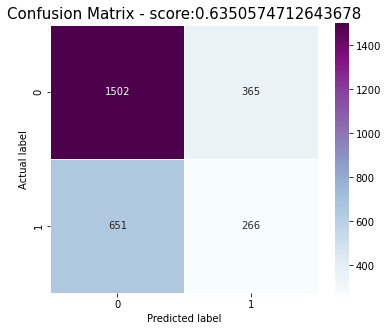

              precision    recall  f1-score   support

           0       0.70      0.80      0.75      1867
           1       0.42      0.29      0.34       917

    accuracy                           0.64      2784
   macro avg       0.56      0.55      0.55      2784
weighted avg       0.61      0.64      0.61      2784



In [121]:
rf_model=RandomForestClassifier(random_state=0)
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
from sklearn import metrics

rf_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(rf_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))


In [122]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13918 entries, 0 to 14460
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   place_delivery  13918 non-null  int64
 1   bw_grams        13918 non-null  int64
 2   csc_mom         13918 non-null  int64
 3   psccat_mom      13918 non-null  int64
 4   educ_mom        13918 non-null  int64
 5   age_hh          13918 non-null  int64
 6   educ_hh         13918 non-null  int64
 7   hhsize_code     13918 non-null  int64
 8   drinkingwater   13918 non-null  int64
 9   collect         13918 non-null  int64
 10  stunting        13918 non-null  int64
dtypes: int64(11)
memory usage: 1.3 MB


In [123]:
new_data.shape

(13918, 11)

In [124]:
new_data['stunting'].value_counts()

0    9346
1    4572
Name: stunting, dtype: int64

In [125]:
from sklearn.utils import resample

# Separate Target Classes
df_1 = new_data[new_data.stunting==0]
df_2 = new_data[new_data.stunting==1]
 
# Upsample minority class
df_2_upsampled4 = resample(df_2, 
                                 replace=True,     # sample with replacement
                                 n_samples=9346,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_upsampled5 = pd.concat([df_1, df_2_upsampled4])
 
# Display new class counts
df_upsampled5.stunting.value_counts()
df_upsampled5.reset_index(drop=True)

,place_delivery,bw_grams,csc_mom,psccat_mom,educ_mom,age_hh,educ_hh,hhsize_code,drinkingwater,collect,stunting
0,1,2500,4,2,1,54,2,1,1,0,0
1,0,3200,2,0,2,36,2,1,0,0,0
2,1,2800,2,0,2,44,1,1,1,0,0
3,1,2700,5,0,3,44,1,1,1,0,0
4,1,3000,1,0,2,49,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
18687,1,1700,2,0,2,42,2,1,0,0,1
18688,1,2880,5,2,2,29,2,1,1,1,1
18689,1,2600,2,0,2,38,1,0,1,0,1
18690,1,2300,5,0,2,36,1,1,0,1,1


In [126]:
df_upsampled5.shape

(18692, 11)

In [127]:
df_upsampled5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18692 entries, 1 to 6481
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   place_delivery  18692 non-null  int64
 1   bw_grams        18692 non-null  int64
 2   csc_mom         18692 non-null  int64
 3   psccat_mom      18692 non-null  int64
 4   educ_mom        18692 non-null  int64
 5   age_hh          18692 non-null  int64
 6   educ_hh         18692 non-null  int64
 7   hhsize_code     18692 non-null  int64
 8   drinkingwater   18692 non-null  int64
 9   collect         18692 non-null  int64
 10  stunting        18692 non-null  int64
dtypes: int64(11)
memory usage: 1.7 MB


In [128]:
df_upsampled5.columns

Index(['place_delivery', 'bw_grams', 'csc_mom', 'psccat_mom', 'educ_mom',
       'age_hh', 'educ_hh', 'hhsize_code', 'drinkingwater', 'collect',
       'stunting'],
      dtype='object')

In [129]:
final1 = df_upsampled5.drop(['stunting'],axis=1)
target1 = df_upsampled5['stunting']

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final1,target1,test_size = 0.2, random_state=42)

In [131]:
Logistic = LogisticRegression()
Log_pred = Logistic.fit(X_train,y_train)
log_pred = Log_pred.predict(X_test)

ascore = accuracy_score(log_pred,y_test)
pred_prob_log_reg = Log_pred.predict_proba(X_test)

print("Training score: {:.3f}".format(Log_pred.score(X_train, y_train)))
print("Accuracy score :",ascore)

Training score: 0.606
Accuracy score : 0.5993581171436213


C:\Users\Supervisor\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [132]:
rforest = RandomForestClassifier(n_estimators=30, max_features=3, random_state=0)
r_pred = rforest.fit(X_train,y_train)
rf_pred = r_pred.predict(X_test)
print("Training score: {:.3f}".format(r_pred.score(X_train, y_train)))
print("Accuracy score: ",accuracy_score(rf_pred,y_test))

pred_prob_rf = r_pred.predict_proba(X_test)



Training score: 0.986
Accuracy score:  0.7962021930997593


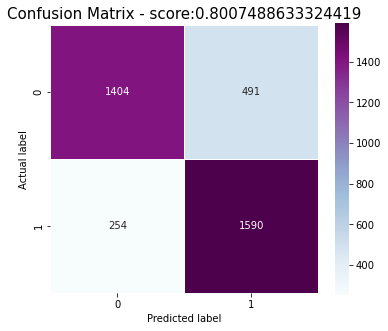

              precision    recall  f1-score   support

           0       0.85      0.74      0.79      1895
           1       0.76      0.86      0.81      1844

    accuracy                           0.80      3739
   macro avg       0.81      0.80      0.80      3739
weighted avg       0.81      0.80      0.80      3739



In [133]:
rf_model=RandomForestClassifier(random_state=0)
rf_model.fit(X_train,y_train)
y_pred=rf_model.predict(X_test)
from sklearn import metrics

rf_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(rf_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))
rf_acc = accuracy_score(y_test,y_pred)

In [134]:
gbr = GradientBoostingClassifier(n_estimators=100, max_depth=10, max_features=3, random_state=0).fit(X_train, y_train)
gbr_pred= gbr.score(X_test, y_test)

gbr_train_accuracy =gbr.score(X_train,y_train)
gbr_accuracy = gbr.score(X_test,y_test)
pred_prob_gbr = gbr.predict_proba(X_test)


print("Training score: {:.3f}".format(gbr.score(X_train, y_train)))
print("Test score: {:.3f}".format(gbr.score(X_test, y_test)))

Training score: 0.906
Test score: 0.753


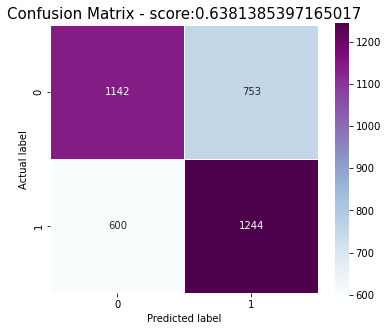

              precision    recall  f1-score   support

           0       0.66      0.60      0.63      1895
           1       0.62      0.67      0.65      1844

    accuracy                           0.64      3739
   macro avg       0.64      0.64      0.64      3739
weighted avg       0.64      0.64      0.64      3739



In [135]:
gbr_model=GradientBoostingClassifier(random_state=0)
gbr_test = gbr_model.fit(X_train,y_train)
y_pred_gbr=gbr_test.predict(X_test)
from sklearn import metrics
gbr_pred_randomstate= gbr.score(X_test, y_test)

gbr_cm = metrics.confusion_matrix(y_test, y_pred_gbr)
plt.figure(figsize=(6,5))
sns.heatmap(gbr_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred_gbr))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred_gbr))
gbr_acc=accuracy_score(y_test,y_pred_gbr)

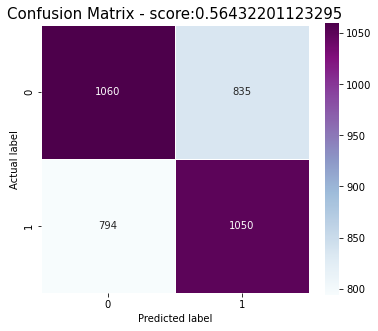

              precision    recall  f1-score   support

           0       0.57      0.56      0.57      1895
           1       0.56      0.57      0.56      1844

    accuracy                           0.56      3739
   macro avg       0.56      0.56      0.56      3739
weighted avg       0.56      0.56      0.56      3739



In [136]:
svc_model=SVC(random_state=0)
svc_model.fit(X_train,y_train)
y_pred=svc_model.predict(X_test)
from sklearn import metrics

svc_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(svc_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))
svc_acc =accuracy_score(y_test,y_pred)


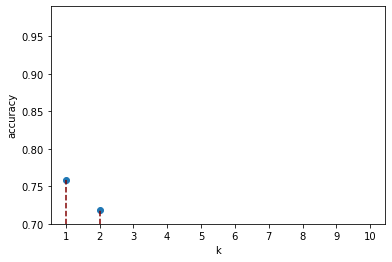

In [137]:
k_range = range(1,11)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.vlines(k_range,0, scores, linestyle="dashed", colors='maroon')
plt.ylim(0.70,0.99)
plt.xticks([i for i in range(1,11)]);

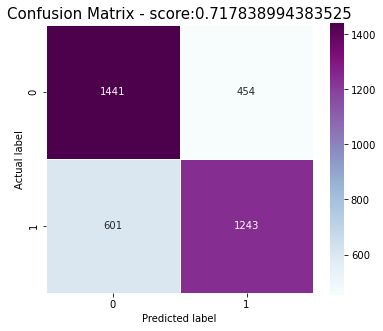

              precision    recall  f1-score   support

           0       0.71      0.76      0.73      1895
           1       0.73      0.67      0.70      1844

    accuracy                           0.72      3739
   macro avg       0.72      0.72      0.72      3739
weighted avg       0.72      0.72      0.72      3739



In [138]:
knn_model=KNeighborsClassifier(n_neighbors = 2)
knn_model.fit(X_train,y_train)
y_pred_knn=knn_model.predict(X_test)
from sklearn import metrics

knn_cm = metrics.confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6,5))
sns.heatmap(knn_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred_knn))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred_knn))
pred_prob_knn = gbr.predict_proba(X_test)
knn_pred_acc = accuracy_score(y_test,y_pred_knn)

In [139]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(X_train,y_train)
XB_pred = XB.score(X_test,y_test)
XB_train_accuracy = XB.score(X_train,y_train)
pred_prob_XB = XB.predict_proba(X_test)

print("Training accuracy = ",XB.score(X_train,y_train))
#Print Test Accuracy
XB_accuracy = XB.score(X_test,y_test)
print("Testing accuracy = ",XB.score(X_test,y_test))

Training accuracy =  0.7729552598140841
Testing accuracy =  0.6790585718106446


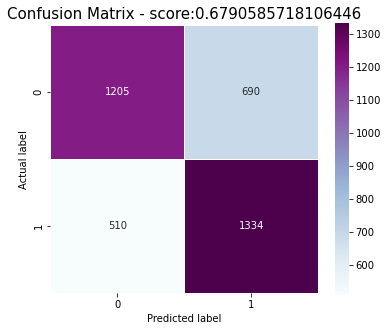

              precision    recall  f1-score   support

           0       0.70      0.64      0.67      1895
           1       0.66      0.72      0.69      1844

    accuracy                           0.68      3739
   macro avg       0.68      0.68      0.68      3739
weighted avg       0.68      0.68      0.68      3739



0.6790585718106446

In [140]:
XB_model=xgb.XGBClassifier()
XB_model.fit(X_train,y_train)
y_pred=XB_model.predict(X_test)
from sklearn import metrics

XB_cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(XB_cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'BuPu');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(y_test,y_pred))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(y_test,y_pred))
XG_BOOST = accuracy_score(y_test,y_pred)
XG_BOOST

In [141]:
#2. Gaussian Naive Bayes Classifier
#t0 = time()
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred = gnb.score(X_test,y_test)
gnb_train_accuracy = gnb.score(X_train,y_train)
pred_prob_gnb = gnb.predict_proba(X_test)
gnb_acc = gnb.predict(X_test)

print("Training accuracy = ",gnb.score(X_train,y_train))
#Print Test Accuracy
gnb_accuracy = gnb.score(X_test,y_test)
print("Testing accuracy = ",gnb.score(X_test,y_test))

Training accuracy =  0.6180699525178894
Testing accuracy =  0.6140679326023001


In [142]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob_log_reg[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob_rf[:,1], pos_label=1)
fpr3, tpr3, thresh3 = roc_curve(y_test, pred_prob_gbr[:,1], pos_label=1)
fpr4, tpr4, thresh4 = roc_curve(y_test, pred_prob_knn[:,1], pos_label=1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob_XB[:,1], pos_label=1)
fpr6, tpr6, thresh6 = roc_curve(y_test, pred_prob_gnb[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob_log_reg[:,1],multi_class='ovr')
auc_score2 = roc_auc_score(y_test, pred_prob_rf[:,1],multi_class='ovr')
auc_score3 = roc_auc_score(y_test, pred_prob_gbr[:,1],multi_class='ovr')
auc_score4 = roc_auc_score(y_test, pred_prob_knn[:,1],multi_class='ovr')
auc_score5 = roc_auc_score(y_test, pred_prob_XB[:,1],multi_class='ovr')
auc_score6 = roc_auc_score(y_test, pred_prob_gnb[:,1],multi_class='ovr')


print(auc_score1, auc_score2,auc_score3, auc_score4,auc_score5,auc_score6)

0.6414313841081967 0.882616515662292 0.8370327497295657 0.8370327497295657 0.7414266622405119 0.6548057166078103


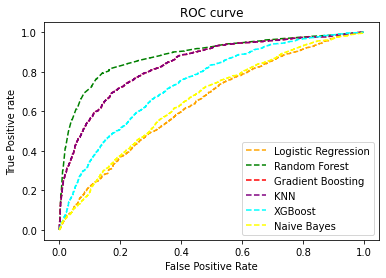

In [143]:
# plot roc curves
plt.plot(fpr1, tpr1,linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2,linestyle='--',color='green', label='Random Forest')
plt.plot(fpr3, tpr3, linestyle='--',color='red', label='Gradient Boosting')
plt.plot(fpr4, tpr4, linestyle='--',color='purple', label='KNN')
plt.plot(fpr5, tpr5, linestyle='--',color='cyan', label='XGBoost')
plt.plot(fpr6, tpr6, linestyle='--',color='yellow', label='Naive Bayes')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

In [144]:
predictions_acc = { "Model": ['Logistic Regression', 'Random Forest Classifier','Gradient Boosting Classifier', 'SVC','KNierest Neighbor','XBoost', 'Naive Bayes Classifier'],
"Accuracy": [ascore,rf_acc,gbr_accuracy,svc_acc,knn_pred_acc,XG_BOOST,gnb_acc2]}

In [145]:
model_acc = pd.DataFrame(predictions_acc, columns=["Model", "Accuracy"])
model_acc

,Model,Accuracy
0,Logistic Regression,0.599358
1,Random Forest Classifier,0.800749
2,Gradient Boosting Classifier,0.753410
3,SVC,0.564322
4,KNierest Neighbor,0.717839
5,XBoost,0.679059
6,Naive Bayes Classifier,0.594054


In [146]:
Model_Name = ['Logistic Regression', 'Random Forest Classifier','Gradient Boosting Classifier', 'SVC','KNierest Neighbor','XBoost', 'Naive Bayes Classifier']
Accuracy = [ascore,rf_acc,gbr_accuracy,svc_acc,knn_pred_acc,XG_BOOST,gnb_acc2]

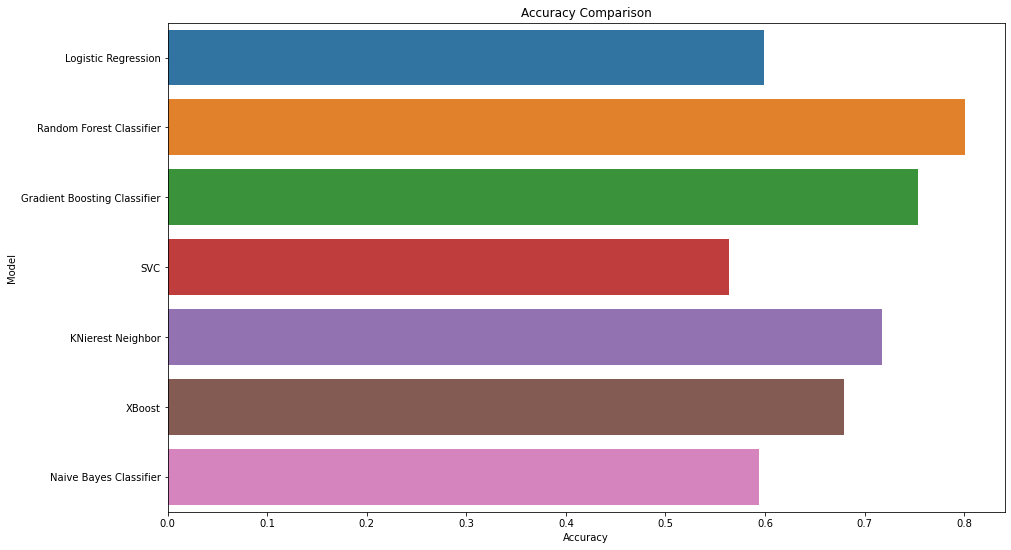

In [147]:
plt.figure(figsize=(15,9))
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
sns.barplot(x = Accuracy,y = Model_Name)
plt.show()

In [148]:
y_test_pred = rf_model.predict(X_test)
print("Accuracy Score of Random Forest:",accuracy_score(y_test,y_test_pred))

Accuracy Score of Random Forest: 0.8007488633324419


In [149]:
output = pd.DataFrame({'Real_class': y_test, 'Predicted_class': y_test_pred, 'Difference': y_test-y_test_pred})
output.head(10)

,Real_class,Predicted_class,Difference
783,1,0,1
951,0,0,0
13641,1,1,0
4121,1,1,0
68,1,1,0
2589,1,1,0
5667,0,0,0
5365,0,1,-1
14156,0,1,-1
12376,1,1,0
